In [2]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import study_pairs_abacus as spa
import abacus_cosmos.Halos as ach
%matplotlib inline
plt.style.use('astroandes.mplstyle')

In [3]:
BoxID = 0
data = spa.load_box(BoxID=BoxID)
vlim = {'mean':627, 'sigma':22}

Finished reading ../data/pairs_box_00.hdf5


In [4]:
data.keys()

dict_keys(['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B', 'mu', 'mu_vv', 'vel_G_mag', 'vmax_G'])

In [5]:
np.count_nonzero(data['vmax_A']<data['vmax_B'])

33663

(array([4675., 4023., 3748., 3513., 3253., 3021., 2912., 2815., 2818.,
        2885.]),
 array([-9.9998927e-01, -7.9999286e-01, -5.9999645e-01, -4.0000001e-01,
        -2.0000359e-01, -7.1823597e-06,  1.9998923e-01,  3.9998564e-01,
         5.9998208e-01,  7.9997849e-01,  9.9997491e-01], dtype=float32),
 <a list of 10 Patch objects>)

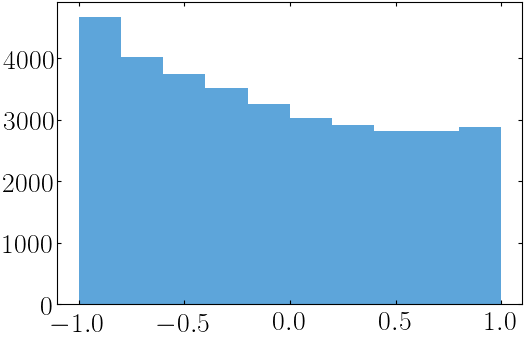

In [6]:
plt.hist(data['mu'])

(array([   86.,   106.,   152.,   233.,   281.,   503.,   833.,  1531.,
         4108., 25830.]),
 array([-0.9979951 , -0.7981957 , -0.5983963 , -0.39859694, -0.19879755,
         0.00100183,  0.20080122,  0.4006006 ,  0.6004    ,  0.8001994 ,
         0.99999875], dtype=float32),
 <a list of 10 Patch objects>)

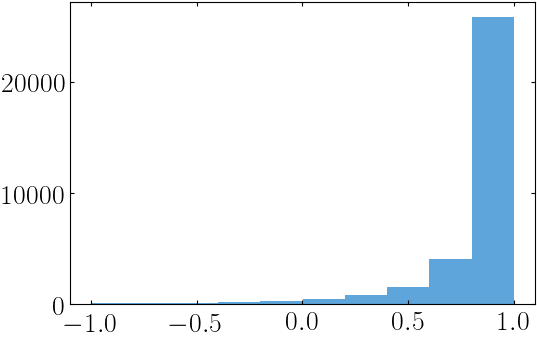

In [7]:
plt.hist(data['mu_vv'])

(array([1.2762e+04, 1.6472e+04, 3.5200e+03, 6.8900e+02, 1.6300e+02,
        4.1000e+01, 9.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([   2.9165447,  180.08731  ,  357.2581   ,  534.42883  ,
         711.5996   ,  888.7704   , 1065.9412   , 1243.1119   ,
        1420.2827   , 1597.4535   , 1774.6243   ], dtype=float32),
 <a list of 10 Patch objects>)

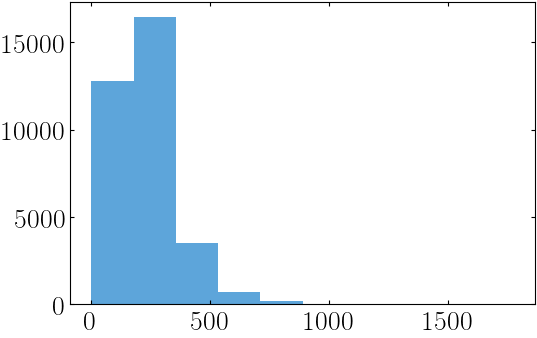

In [10]:
plt.hist(data['vel_AB'])

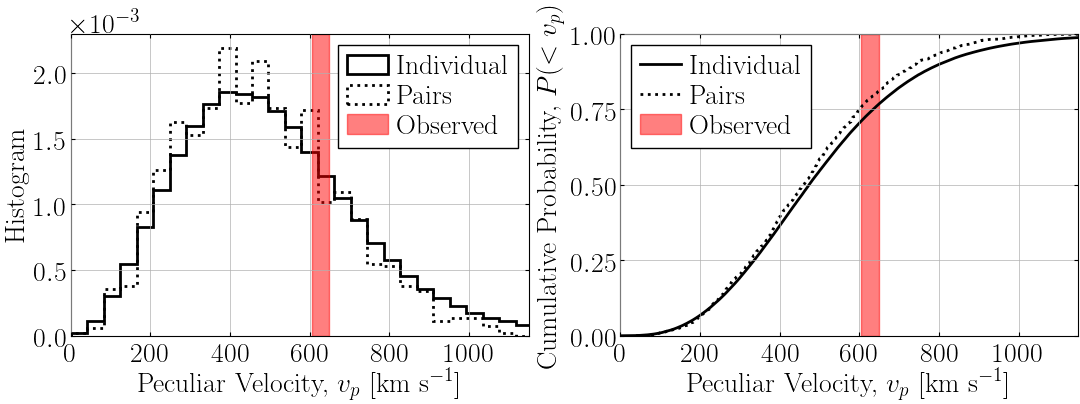

In [11]:
ii = (data['vmax_A']<240) & (data['vmax_B']<240)
ii &= (data['vel_AB_rad']<0) 
ii &= (np.abs(data['vel_AB_rad'])>data['vel_AB_tan'])
jj = (data['vel_B_mag']>vlim['mean'])
ll = (data['vmax_G']<240)
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(data['vel_G_mag'][ll], 
         bins=np.linspace(0,1200,30), 
         density=True, histtype='step', color='black', label='Individual',
         linestyle='-', linewidth=2)
plt.hist(data['vel_B_mag'][ii], 
         bins=np.linspace(0,1200,30),
         density=True, histtype='step', color='black', label='Pairs',
         linestyle=':', linewidth=2)
plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observed')
plt.legend()
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])

plt.grid(linewidth=0.5)

plt.xlabel("Peculiar Velocity, $v_p$ [km s$^{-1}$]")
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observed')
plt.plot(np.sort(data['vel_G_mag'][ll]), 
         np.linspace(0,1,np.count_nonzero(ll)), 
         linestyle='-', color='black', label='Individual')
plt.plot(np.sort(data['vel_B_mag'][ii]), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         linestyle=':', color='black', label='Pairs')

plt.legend()
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])
plt.ylim([0,1])
plt.xlabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.ylabel("Cumulative Probability, $P(<v_p)$")

plt.savefig("../paper/cumulative_probability_{:02d}.pdf".format(BoxID),  bbox_inches="tight")

In [12]:
l_cmb = np.deg2rad(264.0) ; b_cmb = np.deg2rad(48.0)
l_m31 = np.deg2rad(121.0) ; b_m31 = np.deg2rad(-21)

u_cmb = np.array([np.cos(l_cmb)*np.cos(b_cmb), np.sin(l_cmb) * np.cos(b_cmb), np.sin(b_cmb)])
u_m31 = np.array([np.cos(l_m31)*np.cos(b_m31), np.sin(l_m31) * np.cos(b_m31), np.sin(b_m31)])

mu_obs = np.abs(np.sum(u_cmb*u_m31))

print(np.abs(np.sum(u_cmb*u_m31)))

0.765216697356712


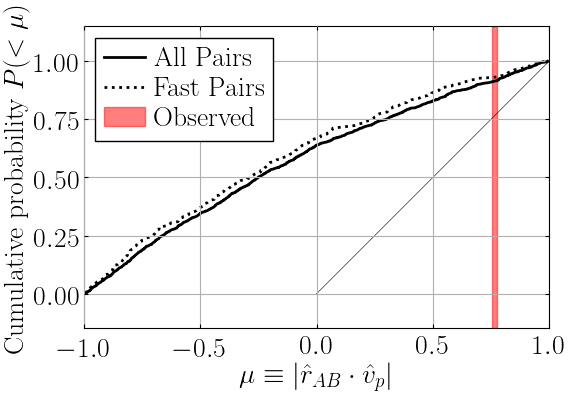

In [18]:
plt.figure()
x = np.linspace(0,1,len(data['mu'][ii&jj]))
plt.plot(x, x, color='black', linewidth=0.4)
plt.plot(np.sort(data['mu'][ii]),np.linspace(0,1,len(data['mu'][ii])), 
        color='black', label='All Pairs',
         linestyle='-', linewidth=2)

plt.plot(np.sort(data['mu'][ii&jj]),np.linspace(0,1,len(data['mu'][ii&jj])), 
        color='black', label='Fast Pairs',
         linestyle=':', linewidth=2)

plt.axvspan(mu_obs-0.01, mu_obs+0.01, 
            alpha=0.5, color='red', label='Observed')

#plt.gca().set_aspect('equal', adjustable='box')
plt.axis('equal')
plt.xlim([-1,1])
plt.ylim([0,1])
plt.xticks(np.linspace(-1,1,5))
plt.yticks(np.linspace(0,1,5))
plt.legend()
plt.grid()
plt.xlabel("$\mu\equiv|\hat{r}_{AB}\cdot \hat{v}_p|$")
plt.ylabel("Cumulative probability $P(<\mu)$")
plt.savefig("../paper/cumulative_alignment_{:02d}.pdf".format(BoxID),  bbox_inches="tight")

In [72]:
dtype=[('BoxID', 'i8'), ('individual_total', 'i8'), ('individual_high', 'i8'), 
       ('pair_total', 'i8'), ('pair_high', 'i8'), ('mean_mu_total', 'f8'), ('mean_mu_fast', 'f8'), 
      ('std_mu_total', 'f8'), ('std_mu_fast', 'f8')]
pair_data = np.loadtxt("../data/summary_pair_count.dat", dtype=dtype)

dtype=[('BoxID','i8'), ('hubble', 'f8'), ('omega_de', 'f8'),
      ('omega_m', 'f8'), ('n_s', 'f8'), ('sigma_8', 'f8'), ('w_0', 'f8')]
cosmo_data = np.loadtxt("../data/box_cosmo_params.dat", dtype=dtype)

In [73]:
def plot_ratio(r, ylabel, filename):
    plt.figure(figsize=(24,4))

    labels = {'hubble':'$H_0$', 'omega_de':'$\Omega_{DE}$', 
            'omega_m':'$\Omega_{M}$', 'n_s':'$n_s$', 
            'sigma_8':'$\sigma_8$', 'w_0':'$w_0$'}

    for k, kk in enumerate(labels.keys()):
        print(k, kk)
        plt.subplot(1,6,k+1)
        plt.scatter(cosmo_data[kk], r)
        plt.xlabel(labels[kk])
        if k==0:
            plt.ylabel(ylabel)
    plt.savefig("../paper/{}".format(filename),  bbox_inches="tight")

0 hubble
1 omega_de
2 omega_m
3 n_s
4 sigma_8
5 w_0


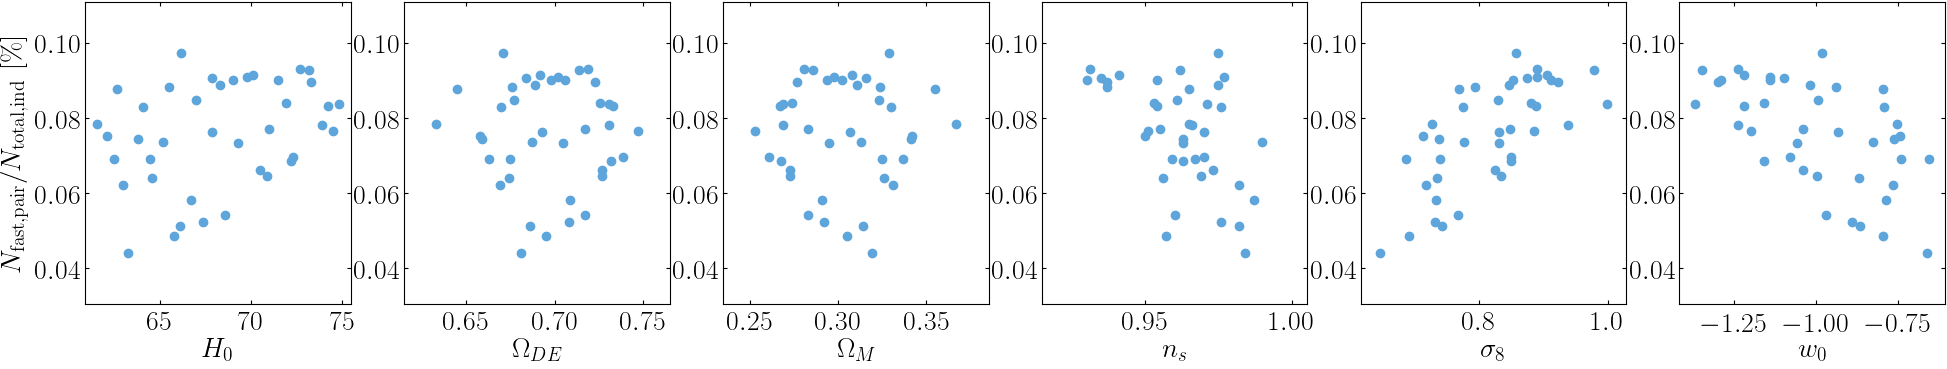

In [103]:
r = 100*pair_data['pair_high']/pair_data['individual_total']
ylabel = r'$N_{\mathrm{fast, pair}}/N_{\mathrm{total, ind}}$ [\%]'
filename = "ratio_pair_high_ind_total.pdf"
plot_ratio(r, ylabel, filename)

0 hubble
1 omega_de
2 omega_m
3 n_s
4 sigma_8
5 w_0


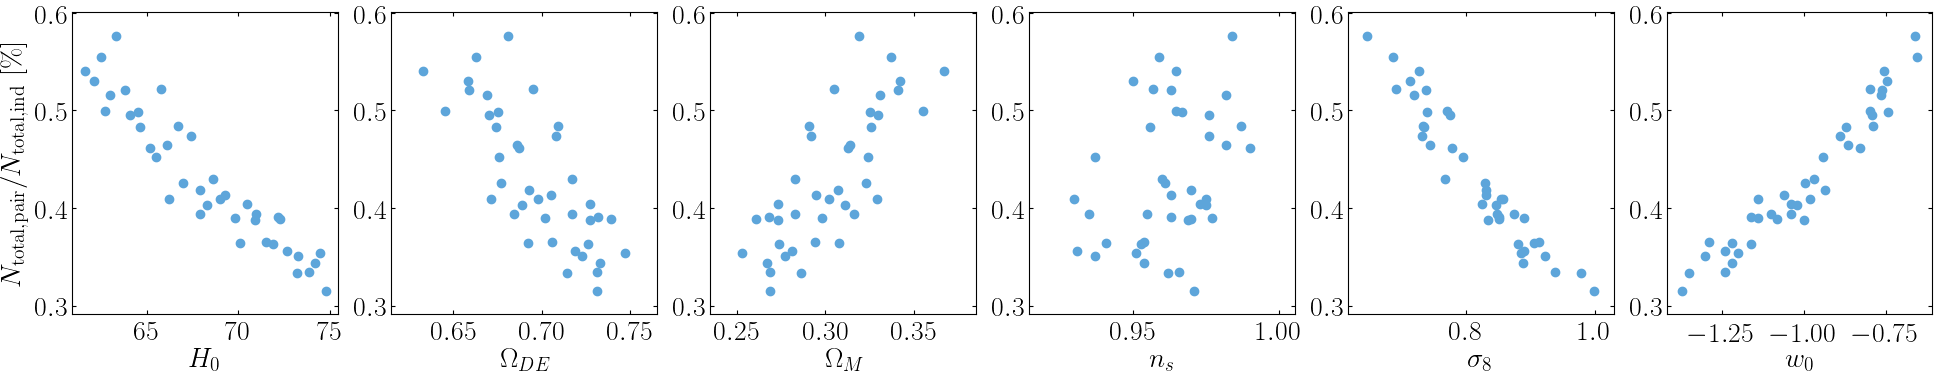

In [75]:
r = 100*pair_data['pair_total']/pair_data['individual_total']
ylabel = r'$N_{\mathrm{total, pair}}/N_{\mathrm{total, ind}}$ [\%]'
filename = "ratio_pair_total_ind_total.pdf"
plot_ratio(r, ylabel, filename)

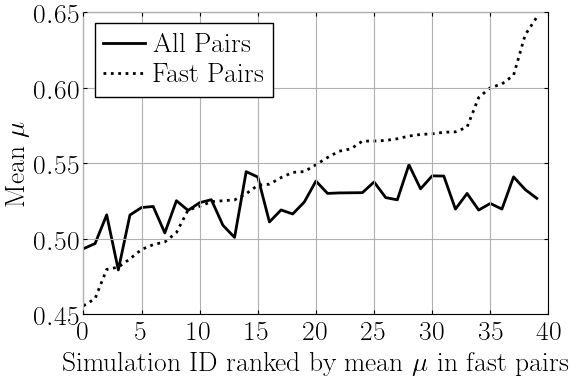

In [104]:
qq = np.argsort(pair_data['mean_mu_fast'])
plt.plot(pair_data['mean_mu_total'][qq], linestyle='-', color='black', label='All Pairs')
plt.plot(pair_data['mean_mu_fast'][qq], linestyle=':', color='black', label='Fast Pairs')

plt.yticks(np.linspace(0.45, 0.65, 5))
plt.xticks(np.linspace(0,40, 9))
plt.grid()
plt.xlim(0,40)
plt.ylim(0.45, 0.65)
plt.ylabel("Mean $\mu$")
plt.xlabel("Simulation ID ranked by mean $\mu$ in fast pairs")
plt.legend()
filename = "mean_mu_in_simulations.pdf"
plt.savefig("../paper/{}".format(filename),  bbox_inches="tight")